In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
claims = pd.read_csv(r"C:\Users\ADMIN\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
customer = pd.read_csv(r"C:\Users\ADMIN\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
customer.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
claims_data = pd.merge(left= customer,right = claims,how= 'inner',left_on ='CUST_ID',right_on = 'customer_id')
claims_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [6]:
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   customer_id          1085 non-null   int64  
 8   incident_cause       1085 non-null   object 
 9   claim_date           1085 non-null   object 
 10  claim_area           1085 non-null   object 
 11  police_report        1085 non-null   object 
 12  claim_type           1085 non-null   object 
 13  claim_amount         1020 non-null   object 
 14  total_policy_claims  1075 non-null   float64
 15  fraudulent           1085 non-null   o

In [7]:
claims_data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [8]:
claims_data["claim_amount"] = pd.to_numeric(claims_data.claim_amount.str.replace("$",""),downcast='float')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8184\893378314.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  claims_data["claim_amount"] = pd.to_numeric(claims_data.claim_amount.str.replace("$",""),downcast='float')


In [9]:
claims_data['DateOfBirth'] = pd.to_datetime(claims_data['DateOfBirth'],format = "%d-%b-%y")

In [10]:
claims_data['Contact']=pd.to_numeric(claims_data['Contact'].str.replace('-',''))

In [11]:
claims_data['claim_date']= pd.to_datetime(claims_data['claim_date'],format = "%m/%d/%Y")

In [12]:
claims_data.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                         int64
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
dtype: object

 ### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [13]:
claims_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [14]:
claims_data['Flag'] = np.where(claims_data.police_report == 'Yes',1,np.where(claims_data.police_report == 'No',0,np.nan))

In [15]:
claims_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,4594254319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1.0
1081,42364152,Female,1996-07-07,ID,5294621635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0.0
1082,19888166,Male,1990-04-11,WI,7126519613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1.0
1083,11256802,Female,2064-10-22,LA,4693455617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0.0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [16]:
claims_data.CUST_ID.nunique()

1078

In [17]:
claims_data = claims_data.groupby('CUST_ID').first()

In [18]:
claims_data

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
CUST_ID,,,,,,,,,,,,,,,,
154557,Female,1978-05-23,DE,9628791238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0.0
263204,Male,1972-12-20,TX,1738926314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0.0
287476,Male,1988-07-28,FL,3645981549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,NaN
441097,Male,1971-08-19,CA,1873488375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,1.0
524545,Female,1980-08-10,NC,7988625398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99674324,Male,2065-01-28,UT,5175624916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,0.0
99723844,Female,2066-06-19,HI,4577521374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,1.0
99761663,Female,2063-11-18,NC,6432464718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0.0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [19]:
claims_data.isna().sum()

gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
Flag                   292
dtype: int64

In [20]:
claims_data['claim_amount'] = claims_data['claim_amount'].fillna(claims_data['claim_amount'].mean())

In [21]:
claims_data['total_policy_claims'] = claims_data['total_policy_claims'].fillna(claims_data['total_policy_claims'].mean())

In [22]:
claims_data.isna().sum()

gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount             0
total_policy_claims      0
fraudulent               0
Flag                   292
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18 ,Youth 18-30 ,Adult 30-60, Senior > 60

In [23]:
claims_data['Age'] = abs(round((claims_data['claim_date'] - claims_data['DateOfBirth'] ).apply(lambda x: x.days)/365.25, 2))

In [24]:
claims_data['Age_group'] = np.where(claims_data.Age < 18 , 'children', np.where(claims_data.Age < 30,'Youth',np.where(claims_data.Age < 60,'Adult',np.where(claims_data.Age <100,'Senior','NAn'))))

In [25]:
claims_data

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_group
CUST_ID,,,,,,,,,,,,,,,,,,
154557,Female,1978-05-23,DE,9628791238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0.0,39.88,Adult
263204,Male,1972-12-20,TX,1738926314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.29,Adult
287476,Male,1988-07-28,FL,3645981549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,NaN,29.22,Youth
441097,Male,1971-08-19,CA,1873488375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.59,Adult
524545,Female,1980-08-10,NC,7988625398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.96,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99674324,Male,2065-01-28,UT,5175624916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0.0,46.56,Adult
99723844,Female,2066-06-19,HI,4577521374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,1.0,48.45,Adult
99761663,Female,2063-11-18,NC,6432464718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0.0,45.62,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [26]:
claims_data.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12756.479492
Platinum    12369.304688
Silver      12269.435547
Name: claim_amount, dtype: float32

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018

In [27]:
 #date= 2018-09-10
claims_data.loc[claims_data['claim_date'] < '2018-09-10'].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                  724462.5
Driver error          3264286.0
Natural causes        1312706.0
Other causes          3725038.5
Other driver error    3318806.5
Name: claim_amount, dtype: float32

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [28]:
claims_data.loc[(claims_data.incident_cause.str.lower().str.contains('driver')) & ((claims_data.State == 'TX') | (claims_data.State == 'DE') | (claims_data.State == 'AK'))].groupby('State')['claim_amount'].count()

State
AK    10
DE    15
TX    10
Name: claim_amount, dtype: int64

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart

In [29]:
p1 = claims_data.groupby(['gender','Segment'])['claim_amount'].sum().reset_index()
p1

,gender,Segment,claim_amount
0,Female,Gold,2109763.5
1,Female,Platinum,2369503.5
2,Female,Silver,1898558.5
3,Male,Gold,2622890.5
4,Male,Platinum,2095815.5
5,Male,Silver,2346666.0


In [30]:
p2 = p1.pivot(index = "Segment", columns = "gender", values = "claim_amount")
p2

gender,Female,Male
Segment,,
Gold,2109763.5,2622890.5
Platinum,2369503.5,2095815.5
Silver,1898558.5,2346666.0


array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

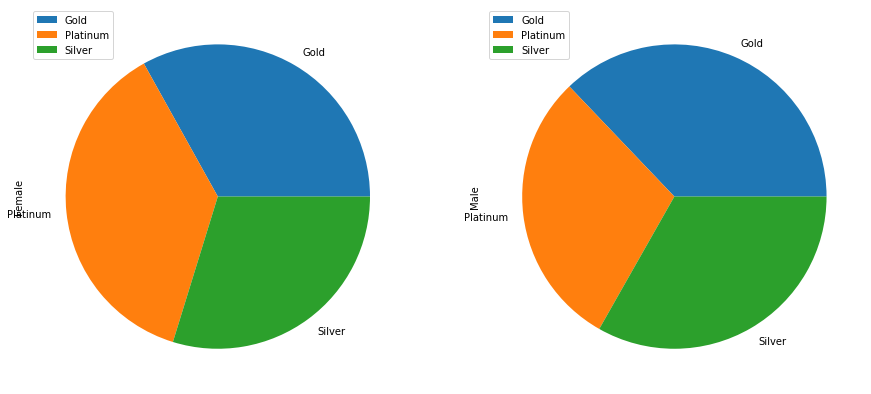

In [31]:
p2.plot(kind='pie',subplots = "true",figsize =(15,8))

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [32]:
bar = claims_data.loc[(claims_data.incident_cause.str.lower().str.contains('driver'))].groupby('gender')['claim_amount'].count()
bar

gender
Female    221
Male      280
Name: claim_amount, dtype: int64

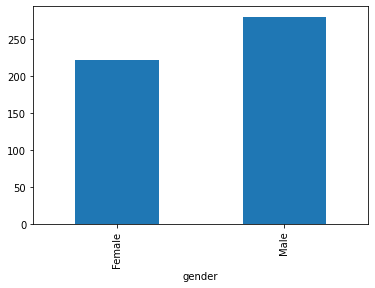

In [33]:
bar.plot(kind= 'bar' )
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [34]:
claims_data

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_group
CUST_ID,,,,,,,,,,,,,,,,,,
154557,Female,1978-05-23,DE,9628791238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0.0,39.88,Adult
263204,Male,1972-12-20,TX,1738926314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.29,Adult
287476,Male,1988-07-28,FL,3645981549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,NaN,29.22,Youth
441097,Male,1971-08-19,CA,1873488375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.59,Adult
524545,Female,1980-08-10,NC,7988625398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.96,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99674324,Male,2065-01-28,UT,5175624916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0.0,46.56,Adult
99723844,Female,2066-06-19,HI,4577521374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,1.0,48.45,Adult
99761663,Female,2063-11-18,NC,6432464718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0.0,45.62,Adult


In [35]:
bar1 = claims_data.loc[claims_data['fraudulent'] == 'Yes'].groupby('Age_group')['fraudulent'].count()
bar1

Age_group
Adult       173
Youth        73
children      1
Name: fraudulent, dtype: int64

<AxesSubplot:xlabel='Age_group'>

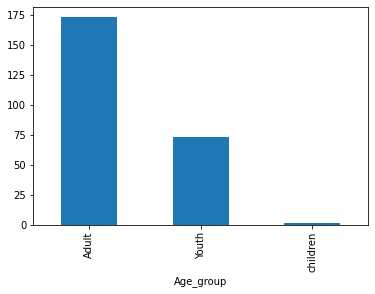

In [36]:
bar1.plot(kind = 'bar')

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [37]:
claims_data['Month'] = claims_data["claim_date"].apply(lambda x : pd.Timestamp.strftime(x, format = "%B"))

In [38]:
claims_data.head(5)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_group,Month
CUST_ID,,,,,,,,,,,,,,,,,,,
154557,Female,1978-05-23,DE,9628791238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0.0,39.88,Adult,April
263204,Male,1972-12-20,TX,1738926314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.29,Adult,April
287476,Male,1988-07-28,FL,3645981549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,NaN,29.22,Youth,October
441097,Male,1971-08-19,CA,1873488375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.59,Adult,March
524545,Female,1980-08-10,NC,7988625398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.96,Adult,July


In [39]:
monthly_trend = claims_data.groupby('Month')['claim_amount'].sum().reset_index()
monthly_trend

,Month,claim_amount
0,April,1276071.5
1,August,911203.5
2,December,696701.5
3,February,1133107.0
4,January,1332012.0
5,July,1379035.0
6,June,1276333.0
7,March,1320094.0
8,May,1114211.5
9,November,601125.0


<AxesSubplot:xlabel='Month'>

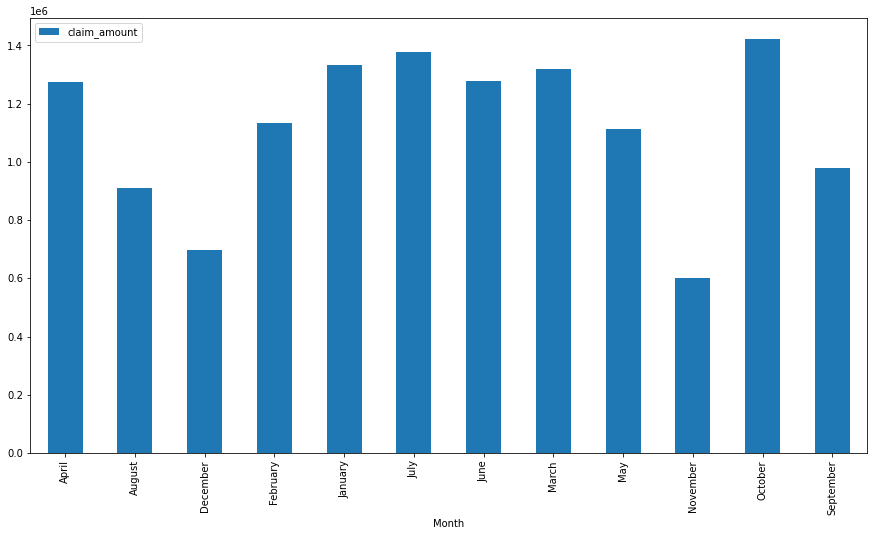

In [40]:
monthly_trend.plot(kind= 'bar',figsize=(15,8),x = 'Month',y='claim_amount')

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [41]:
f1 = claims_data.groupby(['gender','Age_group'])['claim_amount'].mean()
f1

gender  Age_group
Female  Adult        12486.262695
        Youth        11274.854492
        children     11210.000000
Male    Adult        13166.282227
        Youth        11711.381836
        children     20664.500000
Name: claim_amount, dtype: float32

<AxesSubplot:xlabel='gender,Age_group'>

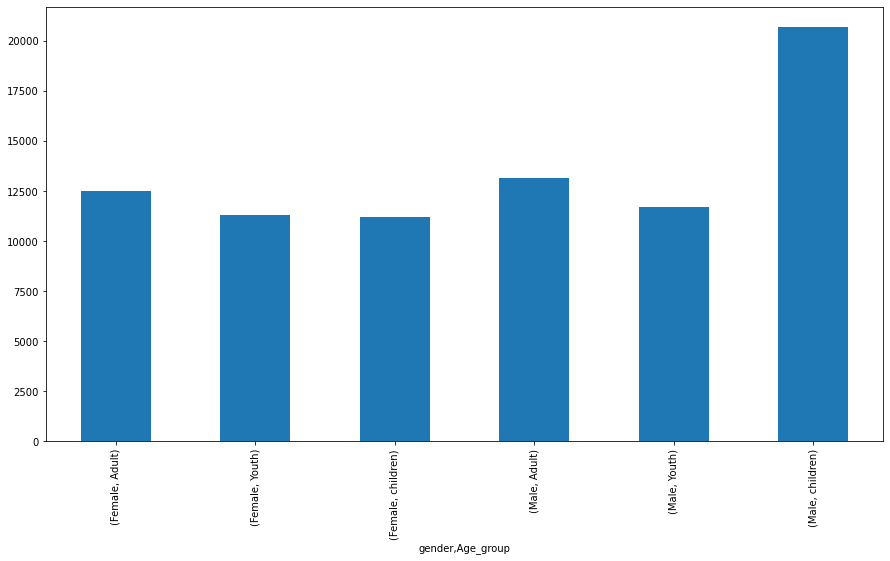

In [42]:
f1.plot(kind = 'bar',figsize = (15,8))

In [45]:
Avg_Claim_Amt = claims_data.groupby(["gender","Age_group","fraudulent"])[["claim_amount"]].mean().reset_index()
Avg_Claim_Amt

,gender,Age_group,fraudulent,claim_amount
0,Female,Adult,No,12494.322266
1,Female,Adult,Yes,12462.083008
2,Female,Youth,No,12300.639648
3,Female,Youth,Yes,7599.125000
4,Female,children,No,11210.000000
5,Male,Adult,No,12091.993164
6,Male,Adult,Yes,17062.199219
7,Male,Youth,No,12193.262695
8,Male,Youth,Yes,10096.432617
9,Male,children,No,18316.000000


In [53]:
fraudaulent = Avg_Claim_Amt.loc[Avg_Claim_Amt['fraudulent']=='Yes'][['Age_group','gender','claim_amount']]
fraudaulent

,Age_group,gender,claim_amount
1,Adult,Female,12462.083008
3,Youth,Female,7599.125000
6,Adult,Male,17062.199219
8,Youth,Male,10096.432617
10,children,Male,32407.000000


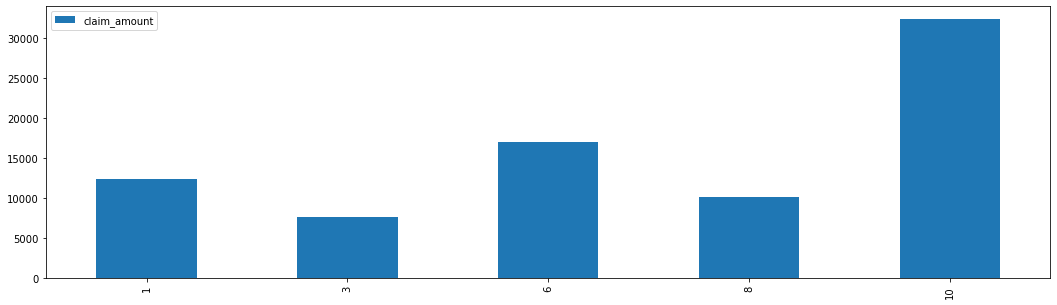

In [57]:
fraudaulent.plot(kind='bar',figsize = (18,5))
plt.show()

In [47]:
non_fraudaulent = Avg_Claim_Amt.loc[Avg_Claim_Amt['fraudulent']=='No',['gender','Age_group','claim_amount']]
non_fraudaulent

,gender,Age_group,claim_amount
0,Female,Adult,12494.322266
2,Female,Youth,12300.639648
4,Female,children,11210.000000
5,Male,Adult,12091.993164
7,Male,Youth,12193.262695
9,Male,children,18316.000000


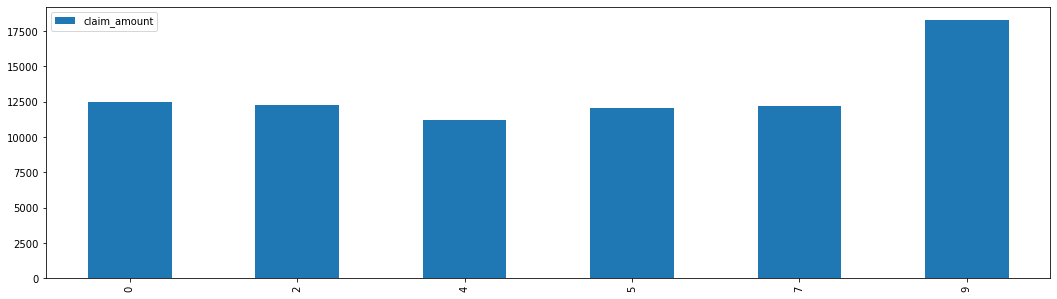

In [181]:
non_fraudaulent.plot(kind='bar',figsize = (18,5))
plt.show()

### 16. Is there any similarity in the amount claimed by males and females?`

In [58]:
# Ho = no relationshio
# Ha = there is a relation b/w amount claimed by males and females.
# CI = 95%
# p = .o5


In [59]:
claims_data.gender.value_counts()

Male      551
Female    527
Name: gender, dtype: int64

In [66]:
Gender_df = claims_data.groupby(['gender','Month'])['claim_amount'].sum().reset_index()
Gender_df

,gender,Month,claim_amount
0,Female,April,643112.5
1,Female,August,440866.5
2,Female,December,246845.0
3,Female,February,489393.0
4,Female,January,658624.0
5,Female,July,724345.0
6,Female,June,702636.0
7,Female,March,559422.0
8,Female,May,534137.0
9,Female,November,158561.0


In [70]:
male_spend = Gender_df.loc[Gender_df['gender'] == 'Male','claim_amount']

In [71]:
female_spend = Gender_df.loc[Gender_df['gender'] == 'Female','claim_amount']

In [73]:
stats.ttest_ind(male_spend,female_spend)

Ttest_indResult(statistic=0.9390689396087925, pvalue=0.35789199770959423)

In [75]:
#pvalue > .05, #which is more .

In [76]:
print (" Business conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship for the amount claimed by males and females" )

 Business conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship for the amount claimed by males and females


### 17. Is there any relationship between age category and segment?`

In [77]:
#Ho = there is no relationship b/w age category and segment
#Ha = there is a relationship b/w age category and segment
#CI = 95%
#p =.05

In [79]:
obs_freq = pd.crosstab(claims_data.Segment,claims_data.Age_group)

In [80]:
stats.chi2_contingency( obs_freq )

(5.0985961310971035,
 0.2773297050612432,
 4,
 array([[256.05194805, 112.19480519,   2.75324675],
        [249.15027829, 109.17068646,   2.67903525],
        [238.79777365, 104.63450835,   2.567718  ]]))

In [81]:
print (" Business conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship between age category and segment" )

 Business conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship between age category and segment


### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was  $10,000.

In [126]:
#Ho = claim amount is less than $10000 in 2018,
#Ha = claim amount is greater than $10000 in 2018
#CI = 95%
#p value = .05

In [82]:
claims_data['Year'] = claims_data['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [115]:
claims_data_new = claims_data.groupby(['Month','Year'])['claim_amount'].sum().reset_index()
claims_data_new

,Month,Year,claim_amount
0,April,2017,747944.5
1,April,2018,528127.0
2,August,2017,431554.0
3,August,2018,479649.5
4,December,2017,696701.5
5,February,2017,633524.0
6,February,2018,499583.0
7,January,2017,610302.5
8,January,2018,721709.5
9,July,2017,790744.0


In [122]:
claims_data_2017 = claims_data_new.loc[claims_data_new['Year'] == '2017','claim_amount'].mean()
claims_data_2017

611718.5625

In [123]:
claims_data_2018= claims_data_new.loc[claims_data_new['Year']== '2018','claim_amount']
claims_data_2018

1     528127.0
3     479649.5
6     499583.0
8     721709.5
10    588291.0
12    716220.5
14    704580.0
16    567563.5
19    775453.5
21    521397.5
Name: claim_amount, dtype: float32

In [125]:
stats.ttest_1samp(claims_data_2018,10000)

Ttest_1sampResult(statistic=17.48320517356718, pvalue=2.962878294488423e-08)

In [127]:
# p value is less than .05
# we reject the null hypothesis and accept Ha i.e claim amount is greater than $10000 in 2018


In [129]:
print("Business Conclusion: Spend on the Insurance Claims has increased from last year spend of $10,000")

Business Conclusion: Spend on the Insurance Claims has increased from last year spend of $10,000


#### 19. Is there any difference between age groups and insurance claims?

In [131]:
#Ho = there is no difference b/w age groups and insurance claims
#Ha = there is a difference b/w age groups and insurance claims
#CI = 95%
# pvalue = .05

In [142]:
claims_data.Age_group.value_counts()

Adult       744
Youth       326
children      8
Name: Age_group, dtype: int64

In [143]:
s1=claims_data.loc[claims_data['Age_group'] =='Adult' ,'claim_amount']

In [144]:
s2=claims_data.loc[claims_data['Age_group'] =='Youth' ,'claim_amount']

In [145]:
s3 = claims_data.loc[claims_data['Age_group'] =='children' ,'claim_amount']

In [151]:
print( 's1:', s1.mean(), 's2:', s2.mean(),  's3:', s3.mean(), 
       's3:' )

s1: 12837.2490234375 s2: 11490.4404296875 s3: 18300.875 s3:


In [146]:
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=1.9209220653040693, pvalue=0.14697427349990372)

In [147]:
#pvalue>.05


In [148]:
print (" Business conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no difference between age groups and insurance claims" )

 Business conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no difference between age groups and insurance claims


### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [174]:
#Ho = There is a Relationship between total number of policy claims and the claimed amount
#Ha = There is no Relationship between total number of policy claims and the claimed amount
#CI = 95%
#pvalue = .05

In [175]:
claims_data.head(1)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_group,Month,Year
CUST_ID,,,,,,,,,,,,,,,,,,,,
154557,Female,1978-05-23,DE,9628791238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0.0,39.88,Adult,April,2018


In [176]:
claims_data.total_policy_claims.value_counts()

1.000000    781
2.000000    104
3.000000     86
4.000000     58
5.000000     27
1.582397     10
6.000000      9
7.000000      2
8.000000      1
Name: total_policy_claims, dtype: int64

In [177]:
s1 = claims_data.loc[ claims_data.total_policy_claims == 1.0, 'claim_amount' ]
s2 = claims_data.loc[ claims_data.total_policy_claims == 2.0, 'claim_amount' ]
s3 = claims_data.loc[ claims_data.total_policy_claims == 3.0, 'claim_amount' ]
s4 = claims_data.loc[ claims_data.total_policy_claims == 4.0, 'claim_amount' ]
s5 = claims_data.loc[ claims_data.total_policy_claims == 5.0, 'claim_amount' ]
s6 = claims_data.loc[ claims_data.total_policy_claims == 6.0, 'claim_amount' ]
s7 = claims_data.loc[ claims_data.total_policy_claims == 7.0, 'claim_amount' ]
s8 = claims_data.loc[ claims_data.total_policy_claims == 8.0, 'claim_amount' ]

In [178]:
print( 'mean s1:', s1.mean(), '| mean s2:', s2.mean(), '| mean s3:', s3.mean(),'mean s4:', s4.mean(), 
       '| mean s5:', s5.mean(), '| mean s6:', s6.mean(),'|mean s7:', s7.mean())

mean s1: 12403.6552734375 | mean s2: 13876.4521484375 | mean s3: 12928.19140625 mean s4: 11049.724609375 | mean s5: 8530.462890625 | mean s6: 15657.8330078125 |mean s7: 23033.0


In [179]:
stats.f_oneway( s1, s2, s3,s4,s5,s6,s7,s8)

F_onewayResult(statistic=0.9303871872119974, pvalue=0.4818261589585725)

In [ ]:
#pvalue > .05

In [180]:
print("Business conclusion: We accept the H0 There is Relationship between total number of policy claims and the claimed amount")

Business conclusion: We accept the H0 There is Relationship between total number of policy claims and the claimed amount
